<a href="https://colab.research.google.com/github/ManuMartinDeveloper/DeepLearning/blob/main/2348531_MLP_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # dot product of inputs and weights + bias
        return self.activation_function(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)  # Update bias

1.Create a Python implementation of the perceptron learning algorithm to train neural networks for the following boolean functions:
1. AND
2. OR
3. NAND
4. XOR

Begin by manually assigning weights and displaying the number of errors between positive and negative outcomes. Then, utilize the perceptron learning algorithm to adjust the weights and eliminate these errors by finding the optimal weight configuration.


Develop a Python script to utilize the gradient descent algorithm for locating the global minima of the following equations. Additionally, ensure the program prints the number of iterations taken to identify the global minima.
Note:Visualize all the results in graph
i) f(x) = x^2 - 2x + 2
ii) f(x, y) = (1 - x)^2 + 100(y - x^2)^2

In [12]:
import numpy as np

def perceptron_AND(x1, x2):
  w1 = 1
  w2 = 1
  b = -1.5
  net_input = w1 * x1 + w2 * x2 + b #maximum weightSum
  # Apply Heaviside step function (activation function) any input is 0 then the output is 0
  output = 1 if net_input >= 0 else 0
  return output

# Test cases
inputs = [
  (0, 0),
  (0, 1),
  (1, 0),
  (1, 1),
]
print("AND FUNCTION")

for x1, x2 in inputs:
  output = perceptron_AND(x1, x2)
  print(f"Input: ({x1}, {x2}), Output: {output}")


AND FUNCTION
Input: (0, 0), Output: 0
Input: (0, 1), Output: 0
Input: (1, 0), Output: 0
Input: (1, 1), Output: 1


In [13]:
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # Desired output for OR function

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(training_inputs, labels)

# Test the trained perceptron
print("OR FUNCTION")
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for inputs in test_inputs:
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs}, Predicted Output: {prediction}")


OR FUNCTION
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


In [15]:
 #Training data for NAND gate
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([1, 1, 1, 0])  # NAND truth table

# Create and train the NAND perceptron
nand_perceptron = Perceptron(input_size=2)
nand_perceptron.train(training_inputs, labels)

# Test the trained NAND perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for inputs in test_inputs:
    output = nand_perceptron.predict(inputs)
    print(f"NAND({inputs[0]}, {inputs[1]}) = {output}")


NAND(0, 0) = 1
NAND(0, 1) = 1
NAND(1, 0) = 1
NAND(1, 1) = 0


In [28]:
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])

# Create a Perceptron instance
perceptron = Perceptron(input_size=2)

# Train the Perceptron
perceptron.train(training_inputs, labels)

# Test the Perceptron
print("Prediction for [0, 0]:", perceptron.predict(np.array([0, 0])))
print("Prediction for [0, 1]:", perceptron.predict(np.array([0, 1])))
print("Prediction for [1, 0]:", perceptron.predict(np.array([1, 0])))
print("Prediction for [1, 1]:", perceptron.predict(np.array([1, 1])))

Prediction for [0, 0]: 1
Prediction for [0, 1]: 1
Prediction for [1, 0]: 0
Prediction for [1, 1]: 0


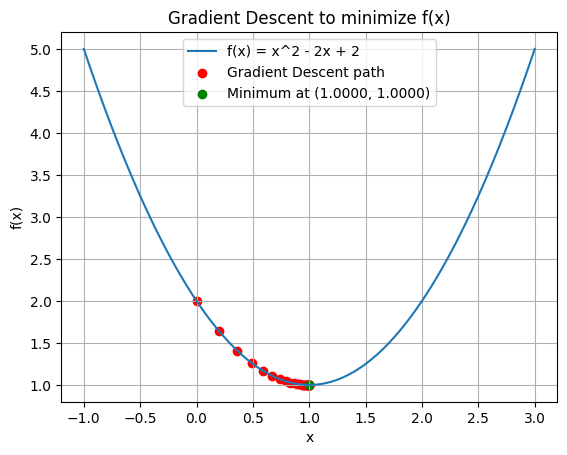

Number of iterations taken to identify the global minima: 55


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2 - 2x + 2
def f(x):
    return x**2 - 2*x + 2

# Define the derivative of the function f(x)
def df(x):
    return 2*x - 2

# Gradient Descent function to find the minimum of f(x)
def gradient_descent(f, df, x0, learning_rate=0.1, epsilon=1e-6, max_iter=1000):
    x = x0
    iter_count = 0
    x_history = [x0]
    while iter_count < max_iter:
        x_new = x - learning_rate * df(x)
        if abs(x_new - x) < epsilon:
            break
        x = x_new
        x_history.append(x)
        iter_count += 1
    return x, f(x), iter_count, x_history

# Find the minimum of f(x)
x_min, min_value, iterations, x_history = gradient_descent(f, df, x0=0)

# Visualize the results
x_values = np.linspace(-1, 3, 400)
plt.plot(x_values, f(x_values), label='f(x) = x^2 - 2x + 2')
plt.scatter(x_history, f(np.array(x_history)), color='red', label='Gradient Descent path')
plt.scatter(x_min, min_value, color='green', label=f'Minimum at ({x_min:.4f}, {min_value:.4f})')
plt.title('Gradient Descent to minimize f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of iterations taken to identify the global minima: {iterations}")

<ipython-input-32-519dd428570c>:3: RuntimeWarning: overflow encountered in square
  return (1 - x)**2 + 100 * (y - x**2)**2


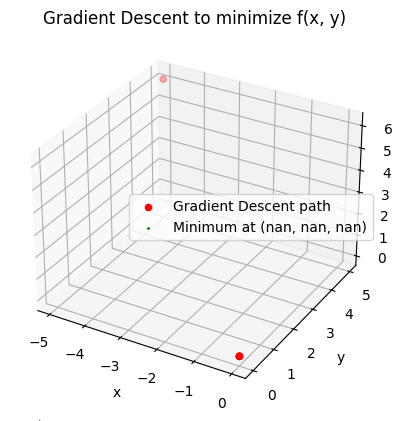

Number of iterations taken to identify the global minima: 1000


In [32]:
# Define the function f(x, y) = (1 - x)^2 + 100(y - x^2)^2
def f2(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define the partial derivatives of the function f(x, y)
def df2_dx(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

def df2_dy(x, y):
    return 200 * (y - x**2)

# Gradient Descent function to find the minimum of f(x, y)
def gradient_descent_2d(f, df_dx, df_dy, x0, y0, learning_rate=0.01, epsilon=1e-6, max_iter=1000):
    x, y = x0, y0
    iter_count = 0
    x_history, y_history = [x0], [y0]
    while iter_count < max_iter:
        x_new = x - learning_rate * df_dx(x, y)
        y_new = y - learning_rate * df_dy(x, y)
        if abs(x_new - x) < epsilon and abs(y_new - y) < epsilon:
            break
        x, y = x_new, y_new
        x_history.append(x)
        y_history.append(y)
        iter_count += 1
    return x, y, f(x, y), iter_count, x_history, y_history

# Find the minimum of f(x, y)
x_min, y_min, min_value, iterations, x_history, y_history = gradient_descent_2d(f2, df2_dx, df2_dy, x0=-2, y0=2)

# Visualize the results
x_values = np.linspace(-3, 3, 400)
y_values = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_values, y_values)
Z = f2(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.scatter(x_history, y_history, f2(np.array(x_history), np.array(y_history)), color='red', label='Gradient Descent path')
ax.scatter(x_min, y_min, min_value, color='green', label=f'Minimum at ({x_min:.4f}, {y_min:.4f}, {min_value:.4f})')

ax.set_title('Gradient Descent to minimize f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()

print(f"Number of iterations taken to identify the global minima: {iterations}")